# Ionosphere Radar Data - Decision Tree Classification
# Student: Sana Ur Rehman Arain
# Course: Data Mining & Machine Learning

## Dataset Information

This radar data was collected by a system in Goose Bay, Labrador using a phased array 
of 16 high-frequency antennas. The system classifies ionosphere readings as:
- **"good"**: Shows evidence of structure in the ionosphere
- **"bad"**: Signals pass through without structure

- **Instances**: 351
- **Attributes**: 34 continuous features (2 per pulse number from 17 pulses)
- **Target**: Binary classification (good/bad)

# ============================================================================
# PART 0: Setup and Data Loading
# ============================================================================

In [23]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Set random seed for reproducibility
np.random.seed(42)

In [25]:
print("="*70)
print("IONOSPHERE DECISION TREE CLASSIFICATION ANALYSIS")
print("="*70)

IONOSPHERE DECISION TREE CLASSIFICATION ANALYSIS


In [26]:
# Load the dataset
print("\n[INFO] Loading Ionosphere dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"
data = pd.read_csv(url, header=None)


[INFO] Loading Ionosphere dataset...


In [27]:
# Create column names
feature_cols = [f'Feature_{i+1}' for i in range(34)]
data.columns = feature_cols + ['Class']

In [28]:
data['Class'] = data['Class'].map({'b': 'bad', 'g': 'good'})

In [29]:
print(f"✓ Dataset loaded successfully!")
print(f"  - Shape: {data.shape}")
print(f"  - Features: {len(feature_cols)}")
print(f"  - Target classes: {data['Class'].unique()}")

✓ Dataset loaded successfully!
  - Shape: (351, 35)
  - Features: 34
  - Target classes: ['good' 'bad']


In [30]:
# Display first few rows
print("\n" + "="*70)
print("DATA PREVIEW")
print("="*70)
print(data.head())


DATA PREVIEW
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0          1          0    0.99539   -0.05889    0.85243    0.02306   
1          1          0    1.00000   -0.18829    0.93035   -0.36156   
2          1          0    1.00000   -0.03365    1.00000    0.00485   
3          1          0    1.00000   -0.45161    1.00000    1.00000   
4          1          0    1.00000   -0.02401    0.94140    0.06531   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_26  Feature_27  \
0    0.83398   -0.37708    1.00000     0.03760  ...    -0.51171     0.41078   
1   -0.10868   -0.93597    1.00000    -0.04549  ...    -0.26569    -0.20468   
2    1.00000   -0.12062    0.88965     0.01198  ...    -0.40220     0.58984   
3    0.71216   -1.00000    0.00000     0.00000  ...     0.90695     0.51613   
4    0.92106   -0.23255    0.77152    -0.16399  ...    -0.65158     0.13290   

   Feature_28  Feature_29  Feature_30  Feature_31  Feature_32  Feature_33  \
0    -0

In [31]:
# Check class distribution
print("\n" + "="*70)
print("CLASS DISTRIBUTION")
print("="*70)
print(data['Class'].value_counts())
print(f"\nClass proportions:\n{data['Class'].value_counts(normalize=True)}")


CLASS DISTRIBUTION
Class
good    225
bad     126
Name: count, dtype: int64

Class proportions:
Class
good    0.641026
bad     0.358974
Name: proportion, dtype: float64


# ============================================================================
# PART 1: Build and Visualize Decision Tree (Full Dataset)
# ============================================================================

In [32]:
print("\n" + "="*70)
print("PART 1: DECISION TREE ON FULL DATASET")
print("="*70)


PART 1: DECISION TREE ON FULL DATASET


In [33]:
# Prepare features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [34]:
print("\n[STEP 1a] Data preparation completed")
print(f"  - X shape: {X.shape}")
print(f"  - y shape: {y.shape}")


[STEP 1a] Data preparation completed
  - X shape: (351, 34)
  - y shape: (351,)


In [35]:
# Build decision tree on full dataset
print("\n[STEP 1b] Building decision tree using full dataset...")
dt_full = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_full.fit(X, y)
print("✓ Decision tree created successfully!")


[STEP 1b] Building decision tree using full dataset...
✓ Decision tree created successfully!


In [36]:
# Print tree structure information
print(f"\n  Tree properties:")
print(f"  - Max depth: {dt_full.get_depth()}")
print(f"  - Number of leaves: {dt_full.get_n_leaves()}")
print(f"  - Number of features used: {np.sum(dt_full.feature_importances_ > 0)}")


  Tree properties:
  - Max depth: 5
  - Number of leaves: 14
  - Number of features used: 11


In [37]:
# Get feature importances
print("\n[STEP 1c] Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_full.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))


[STEP 1c] Top 10 Most Important Features:
   Feature  Importance
 Feature_5    0.505477
Feature_27    0.282120
Feature_16    0.053548
Feature_14    0.033025
 Feature_8    0.027276
 Feature_1    0.026553
Feature_25    0.022705
Feature_10    0.013930
 Feature_3    0.013371
Feature_29    0.011352



[INFO] Plotting decision tree...


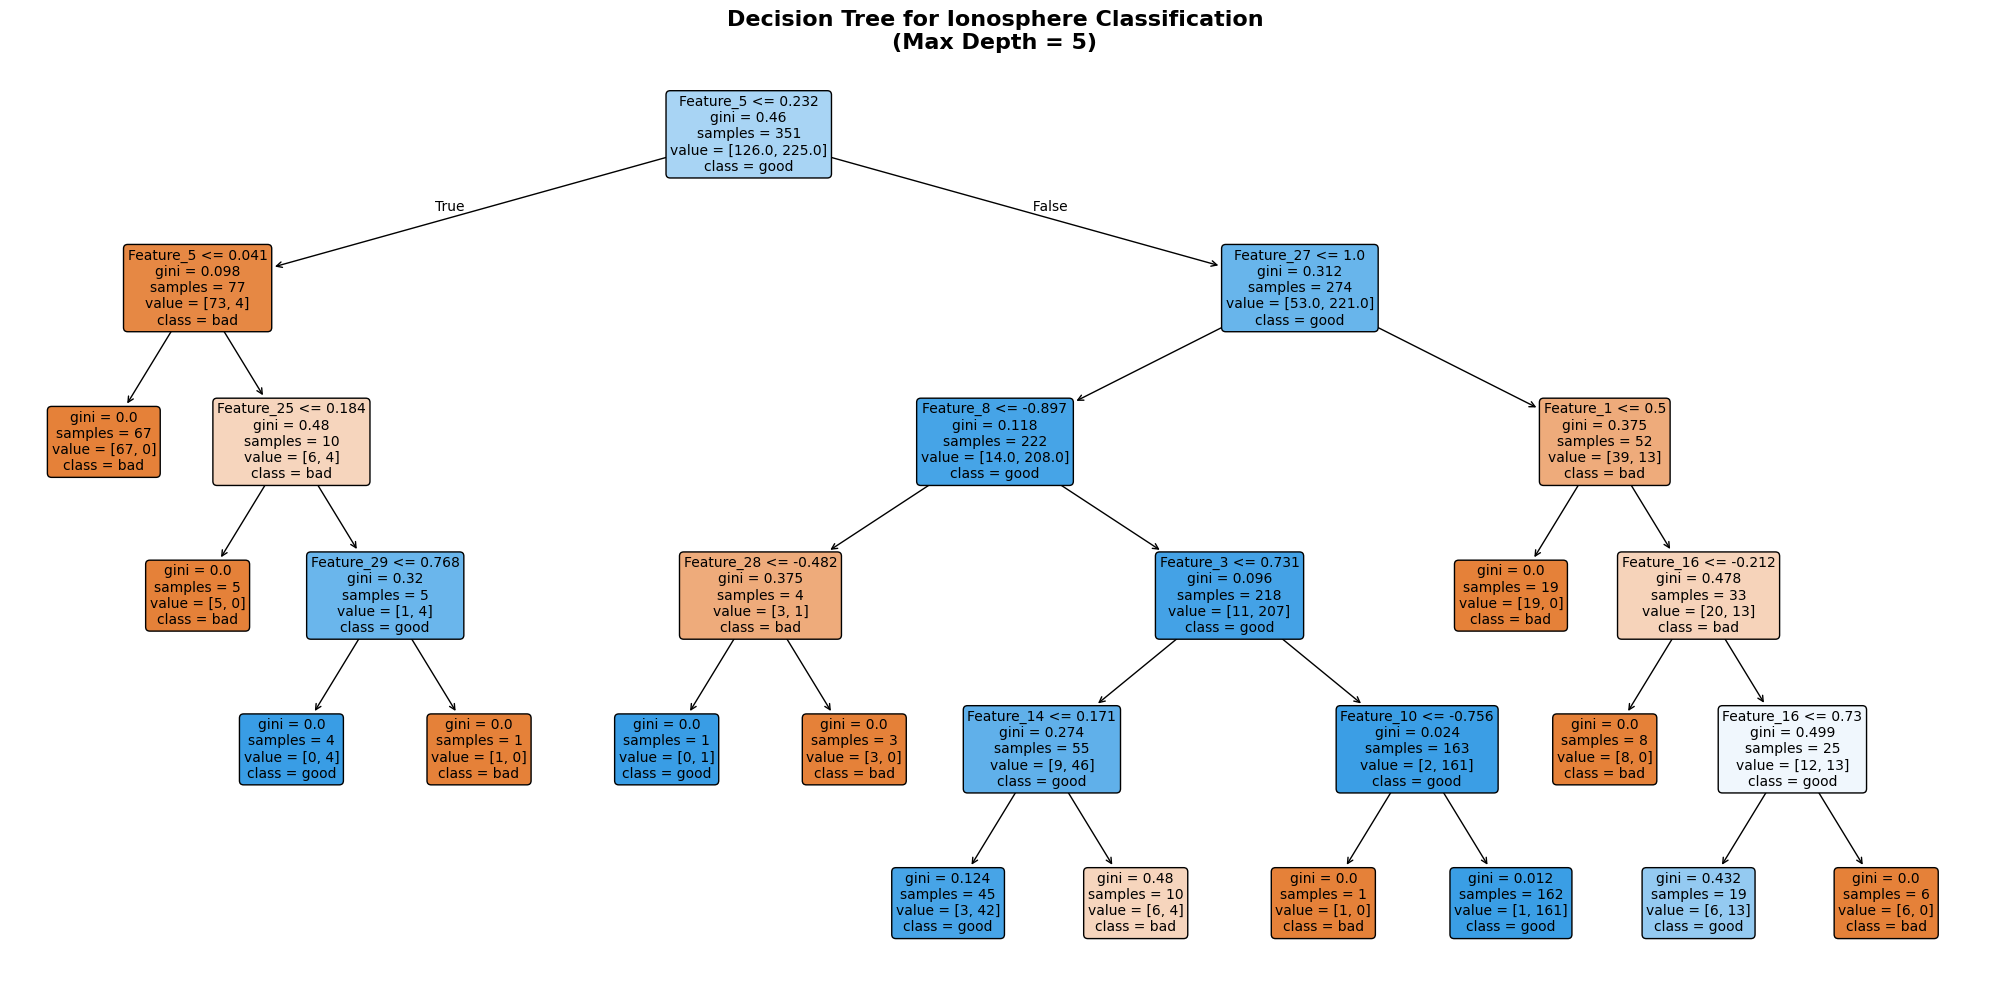

✓ Decision tree plot saved as 'ionosphere_decision_tree_full.png'


In [38]:
# Visualize the decision tree
print("\n[INFO] Plotting decision tree...")
plt.figure(figsize=(20, 10))
plot_tree(dt_full, 
          feature_names=X.columns,
          class_names=['bad', 'good'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Ionosphere Classification\n(Max Depth = 5)", 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('ionosphere_decision_tree_full.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Decision tree plot saved as 'ionosphere_decision_tree_full.png'")

# ============================================================================
# PART 2: Train-Test Split and Accuracy Estimation
# ============================================================================

In [39]:
print("\n" + "="*70)
print("PART 2: MODEL EVALUATION WITH TRAIN-TEST SPLIT")
print("="*70)

# Split data into training and testing sets (70-30 split)
print("\n[STEP 2a] Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


PART 2: MODEL EVALUATION WITH TRAIN-TEST SPLIT

[STEP 2a] Splitting data into train and test sets...


In [40]:
print(f"✓ Data split completed!")
print(f"  - Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  - Testing set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\n  Training class distribution:\n{y_train.value_counts()}")
print(f"\n  Testing class distribution:\n{y_test.value_counts()}")

✓ Data split completed!
  - Training set size: 245 (69.8%)
  - Testing set size: 106 (30.2%)

  Training class distribution:
Class
good    157
bad      88
Name: count, dtype: int64

  Testing class distribution:
Class
good    68
bad     38
Name: count, dtype: int64


In [41]:
# Build decision tree on training data
print("\n[STEP 2b] Building decision tree on training data...")
dt_train = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_train.fit(X_train, y_train)
print("✓ Decision tree trained successfully!")


[STEP 2b] Building decision tree on training data...
✓ Decision tree trained successfully!


In [42]:
# Make predictions on test data
print("\n[STEP 2c] Making predictions on test data...")
y_pred = dt_train.predict(X_test)
print(f"✓ Predictions completed for {len(y_pred)} test samples")


[STEP 2c] Making predictions on test data...
✓ Predictions completed for 106 test samples


In [43]:
# Create confusion matrix
print("\n[STEP 2d] Creating confusion matrix and calculating accuracy...")
cm = confusion_matrix(y_test, y_pred, labels=['bad', 'good'])


[STEP 2d] Creating confusion matrix and calculating accuracy...


In [45]:
print("\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)
print("\n              Predicted")
print("             bad    good")
print("           ┌──────┬──────┐")
print(f"Actual bad │ {cm[0,0]:4d} │ {cm[0,1]:4d} │  (True Negatives | False Positives)")
print("           ├──────┼──────┤")
print(f"      good │ {cm[1,0]:4d} │ {cm[1,1]:4d} │  (False Negatives | True Positives)")


CONFUSION MATRIX

              Predicted
             bad    good
           ┌──────┬──────┐
Actual bad │   32 │    6 │  (True Negatives | False Positives)
           ├──────┼──────┤
      good │    2 │   66 │  (False Negatives | True Positives)


In [46]:
# Calculate metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [47]:
print("\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)
print(f"\nTrue Positives (TP):  {tp:4d}  - Correctly predicted 'good'")
print(f"True Negatives (TN):  {tn:4d}  - Correctly predicted 'bad'")
print(f"False Positives (FP): {fp:4d}  - Incorrectly predicted 'good'")
print(f"False Negatives (FN): {fn:4d}  - Incorrectly predicted 'bad'")
print(f"\n{'─'*50}")
print(f"ACCURACY:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"PRECISION: {precision:.4f} ({precision*100:.2f}%)")
print(f"RECALL:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-SCORE:  {f1_score:.4f}")
print(f"{'─'*50}")


MODEL PERFORMANCE METRICS

True Positives (TP):    66  - Correctly predicted 'good'
True Negatives (TN):    32  - Correctly predicted 'bad'
False Positives (FP):    6  - Incorrectly predicted 'good'
False Negatives (FN):    2  - Incorrectly predicted 'bad'

──────────────────────────────────────────────────
ACCURACY:  0.9245 (92.45%)
PRECISION: 0.9167 (91.67%)
RECALL:    0.9706 (97.06%)
F1-SCORE:  0.9429
──────────────────────────────────────────────────


In [48]:
print(f"\nAccuracy Calculation:")
print(f"  Accuracy = (TP + TN) / Total")
print(f"  Accuracy = ({tp} + {tn}) / {len(y_test)}")
print(f"  Accuracy = {tp + tn} / {len(y_test)}")
print(f"  Accuracy = {accuracy:.4f} or {accuracy*100:.2f}%")


Accuracy Calculation:
  Accuracy = (TP + TN) / Total
  Accuracy = (66 + 32) / 106
  Accuracy = 98 / 106
  Accuracy = 0.9245 or 92.45%


In [49]:
# Detailed classification report
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, target_names=['bad', 'good']))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

         bad       0.94      0.84      0.89        38
        good       0.92      0.97      0.94        68

    accuracy                           0.92       106
   macro avg       0.93      0.91      0.92       106
weighted avg       0.93      0.92      0.92       106



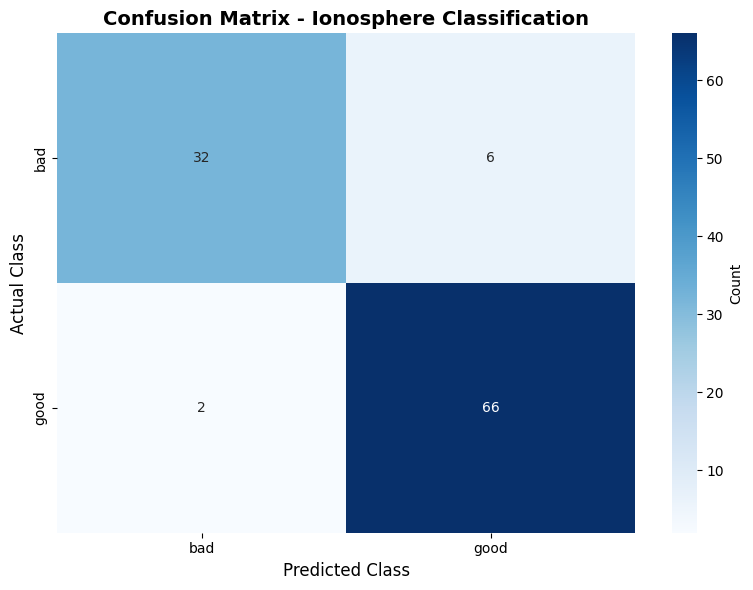

✓ Confusion matrix plot saved as 'ionosphere_confusion_matrix.png'


In [50]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['bad', 'good'],
            yticklabels=['bad', 'good'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Ionosphere Classification', fontsize=14, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('ionosphere_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Confusion matrix plot saved as 'ionosphere_confusion_matrix.png'")

In [51]:
# Compare training vs testing accuracy
train_accuracy = dt_train.score(X_train, y_train)
test_accuracy = dt_train.score(X_test, y_test)

In [52]:
print("\n" + "="*70)
print("TRAINING vs TESTING PERFORMANCE")
print("="*70)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Difference:        {abs(train_accuracy-test_accuracy):.4f} ({abs(train_accuracy-test_accuracy)*100:.2f}%)")


TRAINING vs TESTING PERFORMANCE
Training Accuracy: 0.9755 (97.55%)
Testing Accuracy:  0.9245 (92.45%)
Difference:        0.0510 (5.10%)


In [53]:
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠ Warning: Model may be overfitting (training accuracy >> testing accuracy)")
else:
    print("\n✓ Model shows good generalization")


✓ Model shows good generalization


In [54]:
print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)


ANALYSIS COMPLETE
